In [41]:
import os, sys
import geopandas as gpd

import folium

%matplotlib inline

In [3]:
PROJECT_PATH = "/Users/frankkelly/Dropbox/Projects-new/bristol_emissions/"
shape_file_path = os.path.join(PROJECT_PATH, "data", "respeedbumpsandbristolcitycouncil")

In [4]:
data = gpd.read_file(shape_file_path)

In [5]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [13]:
data.shape

(1637, 10)

In [6]:
data.head()

UID Survey_Dat               Asset_Type Condition  \
0  5b8fa8e76fd45f020c223a3f     Jul-18  Road Markings - Special   Grade 1   
1  5b8fa8f76fd45f020c223a41     Jul-18  Road Markings - Special   Grade 1   
2  5b9779616fd45f1608fa174c     Jul-18  Road Markings - Special   Grade 1   
3  5b97797b6fd45f1608fa1750     Jul-18  Road Markings - Special   Grade 1   
4  5b977b446fd45f1608fa176b     Jul-18  Road Markings - Special   Grade 1   

  Colour Type_of_Li  DfT_Diagra Comments  \
0  White   Unbroken      1062.0     None   
1  White   Unbroken      1062.0     None   
2  White   Unbroken      1062.0     None   
3  White   Unbroken      1062.0     None   
4  White   Unbroken      1062.0     None   

                                          Image_Link  \
0  https://video.gaist.co.uk/video/image/53479884...   
1  https://video.gaist.co.uk/video/image/53479884...   
2  http://video.gaist.co.uk/video/image/146639605...   
3  http://video.gaist.co.uk/video/image/146639605...   
4  http://video.gaist.co.uk/video/image/149223166...   

                                      geometry  
0   POINT (355889.1645356573 179253.954162142)  
1  POINT (355887.9722805619 179253.3147118328)  
2  POINT (356900.4834114368 173832.2589009213)  
3   POINT (356901.747084196 173832.9451556724)  
4  POINT (356880.0492910206 173861.6594493304)

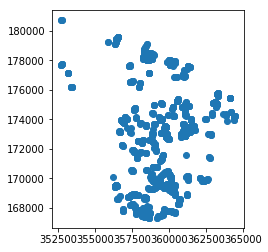

In [9]:
data.plot();

In [10]:
data.crs

{'init': 'epsg:27700'}

Let's try plotting this onto a folium map

In [11]:
gjson = data.to_crs(epsg='4326').to_json()

In [35]:
data["latitude"] = 0
data["longitude"] = 0

In [43]:
# data.loc[:,["latitude", "longitude"]] = 
data["longitude"] = data.to_crs(epsg='4326').geometry.apply(lambda p:p.x)
data["latitude"] = data.to_crs(epsg='4326').geometry.apply(lambda p:p.y)

In [44]:
def plot_gdf_folium(df, gjson, zoom=6):
    """
    Plot a folium map of a dataframe
    Parameters
    ----------
    gdf: pandas dataframe
        Must have columns 'lat' and 'long' containing latitude and longitude respectively
    zoom: int
        zoom_start of the folium map
    Returns
    -------
    folium map
        Map of row locations
    """
    df = df.sample(100).copy()
    centre_lat = (df['latitude'].max()+df['latitude'].min())/2
    centre_lng = (df['longitude'].max()+df['longitude'].min())/2

    mapa = folium.Map(width=400,height=500,location=[centre_lat, centre_lng], 
                      zoom_start = zoom)
    
    points = folium.features.GeoJson(gjson)
    mapa.add_children(points)

#     for _,row in df.iterrows():
#             folium.CircleMarker(location=(row['lat'], row['long']), fill=True,
#                                 radius=2).add_to(mapa)

    return mapa

# plot_df_folium(waterlevelDF)
plot_gdf_folium(data, gjson, 14)

/Users/frankkelly/.virtualenvs/bristol-emissions-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
